#### Bethanie Williams
#### Logistic Regression
#### Date: 10/6/20

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl  # import python libraries that I will need to use
import seaborn as sb
import pylab
import sklearn
import scipy
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 8)

In [2]:
from pandas import read_csv
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression  # importing libraries I will use 
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score  # many libraries form sklearn
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

###############################################################################################################################

# ------------------------------------------- PART 1 -------------------------------------------------------

## Step 1: Loading and Plotting Data

In [3]:
dataset1 = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC 5220\Lab3_data1.txt', header=None, names=['Exam1','Exam2', "Admittance"]) # importing csv
print(dataset1)  # you will need to change the file directory

        Exam1      Exam2  Admittance
0   34.623660  78.024693           0
1   30.286711  43.894998           0
2   35.847409  72.902198           0
3   60.182599  86.308552           1
4   79.032736  75.344376           1
..        ...        ...         ...
95  83.489163  48.380286           1
96  42.261701  87.103851           1
97  99.315009  68.775409           1
98  55.340018  64.931938           1
99  74.775893  89.529813           1

[100 rows x 3 columns]


In [4]:
def plot_data():
    positive = dataset1[dataset1['Admittance'].isin([1])]  # plotting data
    negative = dataset1[dataset1['Admittance'].isin([0])]

    plt.subplots(figsize=(12,8))
    plt.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')  # using scatter plots
    plt.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
    plt.xlabel('Exam1 Score')
    plt.ylabel('Exam2 Score')
    plt.legend(loc = "best")

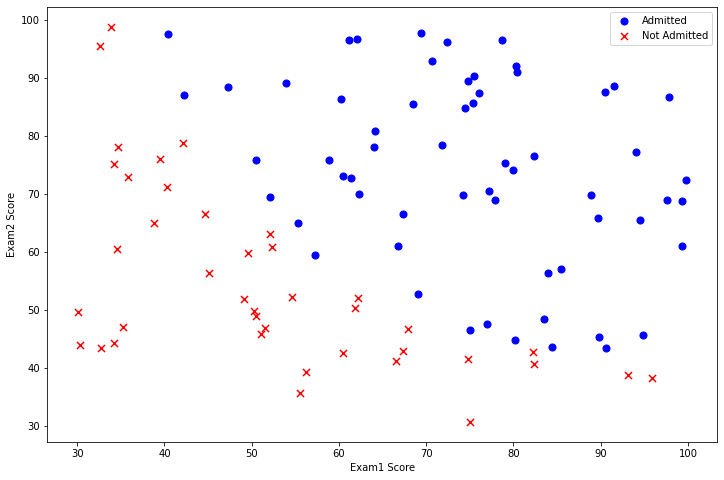

In [5]:
plot_data()

################################################################################################################################

## Step 2: Creating Sigmoid Function

In [6]:
def sigmoid_function(theta_tx):
    return 1 / (1 + np.exp(-theta_tx))  # creating sigmoid function

In [7]:
sigmoid_function(0)

0.5

################################################################################################################################

## Step 3: Implementing Cost Function and Finding Optimal Coefficients

In [8]:
dataset1.insert(0, 'Ones', 1)  # add a ones column to make matrix multiplication easier
print(dataset1)

x = dataset1.iloc[:,0:3] # set x (training data) 
# print(x)
y = dataset1.iloc[:,3:4] # set y (target variable)
# print(y)

x = np.array(x.values) # convert to numpy arrays 
# print(x)
y = np.array(y.values)
# print(y)

theta = np.zeros(3) # initalize the theta with 3 zeros
# print(theta)

print()
print("Shapes of data sets for x, y, and theta:", x.shape, y.shape, theta.shape,) # looking at the shapes of data sets 

    Ones      Exam1      Exam2  Admittance
0      1  34.623660  78.024693           0
1      1  30.286711  43.894998           0
2      1  35.847409  72.902198           0
3      1  60.182599  86.308552           1
4      1  79.032736  75.344376           1
..   ...        ...        ...         ...
95     1  83.489163  48.380286           1
96     1  42.261701  87.103851           1
97     1  99.315009  68.775409           1
98     1  55.340018  64.931938           1
99     1  74.775893  89.529813           1

[100 rows x 4 columns]

Shapes of data sets for x, y, and theta: (100, 3) (100, 1) (3,)


In [9]:
def cost(theta, x, y, lamb = 0):
    m = y.size
    theta = np.matrix(theta)  # creating cost function
    x = np.matrix(x)
    y = np.matrix(y)
    j1 = np.multiply(-y, np.log(sigmoid_function(x * theta.T)))  # uses formula from slide 22 
    j2 = np.multiply((1 - y), np.log(1 - sigmoid_function(x * theta.T)))
    regularization = (lamb / 2 * len(x)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2)) # includes regularization 
    cost_total  = np.sum(j1 - j2) / (len(x)) + regularization
    gradient = ((1 / m)*(x.T.dot(sigmoid_function(x * theta.T) - y)) + (lamb / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel() 
    return cost_total, gradient

In [10]:
cost(theta, x, y) # calling cost function to output results

(0.6931471805599453, matrix([[ -0.1       , -12.00921659, -11.26284221]]))

In [11]:
def optimal_coeff(theta, x, y, lamb = 0):  # create function to find the optimal/best coefficients
    opt_coeff = minimize(fun = cost, x0 = theta, args = (x, y, lamb), method = 'Nelder-Mead', jac=True )
    return opt_coeff.x  # above we use Nelder-Mead yields best fit

In [12]:
print(optimal_coeff(theta, x, y))

[-25.16130062   0.20623142   0.20147143]


C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


In [13]:
optimal_thetas = optimal_coeff(theta, x, y, 0)
cost(optimal_thetas, x, y)[0]  # calls the cost function for optimal thetas

0.20349770159021519

###############################################################################################################################

## Step 4: Implementing Prediction Function

In [14]:
def predict(theta, x):  # creating prediction function 
    predicted_values = []
    probability = sigmoid_function(x * theta.T) # the probabilty or likelihood it will be a 1 or 0
    for x in probability:
        if x >= 0.5:  # if x is above the threshold of 0.5 it predicts a 1
            predicted_values.append(1)
        else:
            predicted_values.append(0) # else it predicts a 0
    return predicted_values

In [15]:
minimized_thetas = np.matrix(optimal_thetas)
predicted_values = predict(minimized_thetas, x)
print(predicted_values)
one_counter = 0  # created a counter to see how many students were admitted or not
zero_counter = 0
for i in predicted_values:
    if i == 1:
        one_counter += 1
    else:
        zero_counter +=1

print()       
print("Number of Admitted Students:", one_counter)
print("Number of NOT Admitted Students:", zero_counter)

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]

Number of Admitted Students: 61
Number of NOT Admitted Students: 39


###############################################################################################################################

## Step 5: Splitting Data, Evaluating Model, and Creating Decision Boundary

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)  # splitting data 
# print("x_train:" '\n', x_train) # print("x_test:" '\n', x_test)
# print("y_train:" "\n", y_train) # print("y_test:" "\n", y_test)

In [17]:
optimizing = optimal_coeff(theta, x_train, y_train)
opt_matrix = np.matrix(optimizing)
yTrain_predicted_values = predict(opt_matrix, x_train) # evaluating model with training data

print("Confusion Matrix:\n", confusion_matrix(y_train, yTrain_predicted_values)) # calculating the confusion matrix
print("Precision:", precision_score(y_train, yTrain_predicted_values))  # calculating precision
print("Recall:", recall_score(y_train, yTrain_predicted_values))  # calculating recall
print("F1:", f1_score(y_train, yTrain_predicted_values))  # calculating F1 score
print("Accuracy:", accuracy_score(y_train, yTrain_predicted_values))   # calculating accuracy
print("ROC AUC Score:", roc_auc_score(y_train, yTrain_predicted_values))  # # calculating ROC_AUC score

Confusion Matrix:
 [[28  4]
 [ 3 45]]
Precision: 0.9183673469387755
Recall: 0.9375
F1: 0.9278350515463918
Accuracy: 0.9125
ROC AUC Score: 0.90625


In [18]:
yTest_predicted_values = predict(opt_matrix, x_test) # evaluating model with test data

print("Confusion Matrix:\n", confusion_matrix(y_test, yTest_predicted_values))
print("Precision:",precision_score(y_test, yTest_predicted_values))
print("Recall:",recall_score(y_test, yTest_predicted_values))
print("F1:", f1_score(y_test, yTest_predicted_values))
print("Accuracy:", accuracy_score(y_test, yTest_predicted_values))
print("ROC AUC Score:", roc_auc_score(y_test, yTest_predicted_values))

Confusion Matrix:
 [[8 0]
 [4 8]]
Precision: 1.0
Recall: 0.6666666666666666
F1: 0.8
Accuracy: 0.8
ROC AUC Score: 0.8333333333333333


In [19]:
def plotting_decision():  # plotting the decision boundary
    optimal_thetas = optimal_coeff(theta, x, y)
    plot_x = np.array([min(x[:,2]-2), max(x[:,2]+2)])  # creates decision boundary here
    plot_y = (-1/optimal_thetas[2])*(optimal_thetas[1] * plot_x + optimal_thetas[0])

    positive = dataset1[dataset1['Admittance'].isin([1])] # calls data sets
    negative = dataset1[dataset1['Admittance'].isin([0])]

    plt.subplots(figsize=(12,8))
    plt.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
    plt.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
    plt.plot(plot_x, plot_y, c= "green", label = "Decision Boundary")
    plt.xlabel('Exam1 Score')
    plt.ylabel('Exam2 Score')
    plt.legend(loc = "best")
    plt.show()


C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


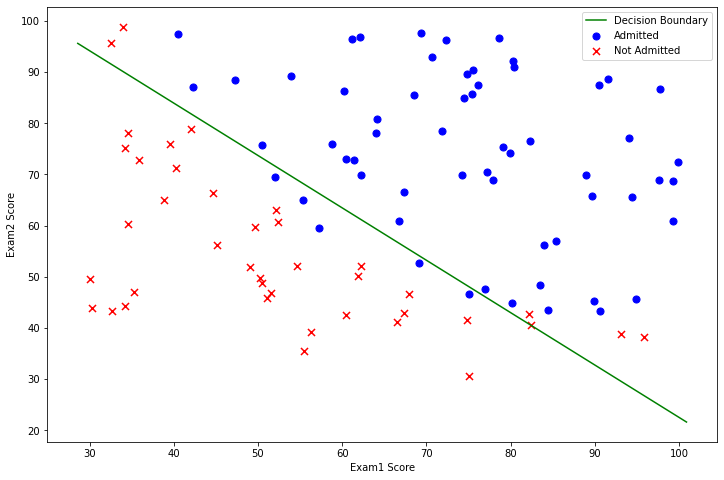

In [20]:
plotting_decision()

###############################################################################################################################

## Step 6: Built-in Logistic Regression Function of Scikit Learn

In [21]:
model = LogisticRegression()  # uses built in logistic function
model.fit(x_train, y_train)
predicted_classes = model.predict(x_test)  # uses skit learn to compare to results above 
confuse_matrix =confusion_matrix(y_test.flatten(),predicted_classes)
precision = precision_score(y_test.flatten(),predicted_classes)
recall = recall_score(y_test.flatten(),predicted_classes)
F1 = f1_score(y_test.flatten(),predicted_classes)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
roc_auc = roc_auc_score(y_test.flatten(),predicted_classes)
parameters = model.coef_

print('The confusion matrix using scikit-learn is: \n {}'.format(confuse_matrix))
print('The precision score using scikit-learn is: {}'.format(precision))
print('The recall score using scikit-learn is: {}'.format(recall))
print('The F1 score using scikit-learn is: {}'.format(F1))
print('The accuracy score using scikit-learn is: {}'.format(accuracy))  # the results of the built in functions on scikit learn
print('The ROC-AUC score using scikit-learn is: {}'.format(roc_auc))   # are VERY VERY similar to my results above

The confusion matrix using scikit-learn is: 
 [[8 0]
 [4 8]]
The precision score using scikit-learn is: 1.0
The recall score using scikit-learn is: 0.6666666666666666
The F1 score using scikit-learn is: 0.8
The accuracy score using scikit-learn is: 0.8
The ROC-AUC score using scikit-learn is: 0.8333333333333333


C:\Users\betha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


###############################################################################################################################

# ------------------------------------------- PART 2 -------------------------------------------------------

## Step 1: Loading and Plotting Data

In [22]:
dataset2 = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC 5220\Lab3_data2.txt', header=None, names=['Microchip Test1','Microchip Test2', "Grade"]) # importing csv
print(dataset2)  # you will probably need to change the file directory

     Microchip Test1  Microchip Test2  Grade
0           0.051267         0.699560      1
1          -0.092742         0.684940      1
2          -0.213710         0.692250      1
3          -0.375000         0.502190      1
4          -0.513250         0.465640      1
..               ...              ...    ...
113        -0.720620         0.538740      0
114        -0.593890         0.494880      0
115        -0.484450         0.999270      0
116        -0.006336         0.999270      0
117         0.632650        -0.030612      0

[118 rows x 3 columns]


In [23]:
def plot_data2(): # plotting data
    positive = dataset2[dataset2['Grade'].isin([1])]
    negative = dataset2[dataset2['Grade'].isin([0])]

    fig, ax = plt.subplots(figsize=(12,8)) # repeat of what I did above
    ax.scatter(positive['Microchip Test1'], positive['Microchip Test2'], s=50, c='b', marker='o', label='Passed')
    ax.scatter(negative['Microchip Test1'], negative['Microchip Test2'], s=50, c='r', marker='x', label='Failed')
    ax.set_xlabel('Microchip Test1 Score')
    ax.set_ylabel('Microchip Test2 Score')
    ax.legend(loc = "best")

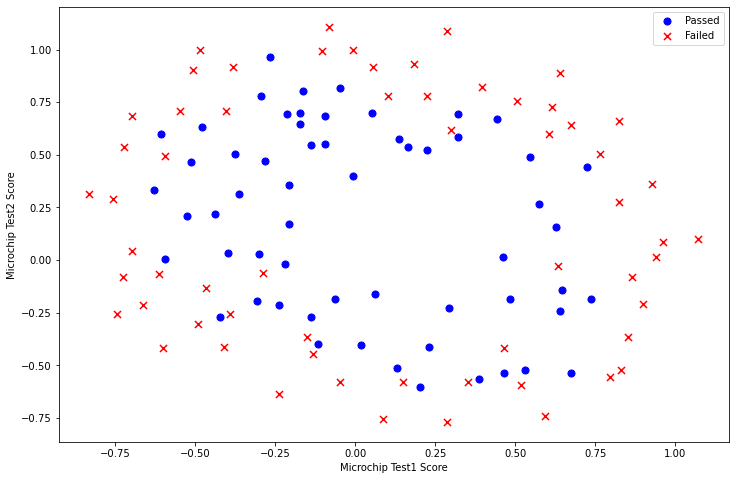

In [24]:
plot_data2()

###############################################################################################################################

## Step 2: Does a linear boundary exist?

### No, I do not believe that a linear boundary exists. The data cannot be separated by line because the data is too dispersed and mixed together. 

###############################################################################################################################

## Step 3: Create function that maps features into polynomial terms

In [25]:
def map_poly_features(x1, x2):  # maps features into polynomial terms 
    degree = 6
    output = np.ones(x.shape[0])[:,np.newaxis]
    counter = 1  # setting a counter to make sure there are 28 terms when I output
    for i in range(1, degree+1):
        for j in range(i+1):
            output = np.hstack((output, np.multiply(np.power(x1, i-j), np.power(x2, j))[:,np.newaxis]))
            counter += 1
    print("Total Number of Polynomial Terms:", counter)
    return output # return polynomials

In [26]:
x = dataset2.iloc[:,0:3] # set x (training data) 
map_poly_features(x.iloc[:,0], x.iloc[:,1])

Total Number of Polynomial Terms: 28


<ipython-input-25-05943e722698>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  output = np.hstack((output, np.multiply(np.power(x1, i-j), np.power(x2, j))[:,np.newaxis]))


array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [27]:
x_poly= map_poly_features(x.iloc[:,0], x.iloc[:,1])
print(x_poly.shape)

Total Number of Polynomial Terms: 28
(118, 28)


<ipython-input-25-05943e722698>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  output = np.hstack((output, np.multiply(np.power(x1, i-j), np.power(x2, j))[:,np.newaxis]))


In [28]:
def poly_features_table(): # doing the same thing as above for mapping of polynomial terms
    degree = 6             # however, now I am putting the results into a table 
    x1 = dataset2['Microchip Test1']
    x2 = dataset2['Microchip Test2']

    dataset2.insert(3, 'Ones', 1)

    for i in range(0, degree+1):
        for j in range(0, i+1):
            dataset2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

    dataset2.drop('Microchip Test1', axis=1, inplace=True)
    dataset2.drop('Microchip Test2', axis=1, inplace=True)

    return dataset2.head()

In [29]:
poly_features_table()

,Grade,Ones,F00,F10,F11,F20,F21,F22,F30,F31,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,1,1,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


###############################################################################################################################

## Step 4: Implementing Cost Function w/ Regularization and Finding Optimal Coefficients

In [30]:
x2 = dataset2.iloc[:,1:30] # set x (training data) 
# print(x2)
y2 = dataset2.iloc[:,0:1] # set y (target variable)
# print(y2)

x2 = np.array(x2.values) # convert to numpy arrays 
# print(x2)
y2 = np.array(y2.values)
# print(y2)

theta2 = np.zeros(29) # initalize the theta with 11 zeros
# print(theta)

print("Shapes of data sets for x, y and theta:", x2.shape, theta2.shape, y2.shape) # looking at the shapes of data sets 

Shapes of data sets for x, y and theta: (118, 29) (29,) (118, 1)


In [31]:
cost(theta2, x2, y2, 0)  # calling cost funciton 

(0.6931471805599454,
 matrix([[8.47457627e-03, 8.47457627e-03, 1.87880932e-02, 7.77711864e-05,
          5.03446395e-02, 1.15013308e-02, 3.76648474e-02, 1.83559872e-02,
          7.32393391e-03, 8.19244468e-03, 2.34764889e-02, 3.93486234e-02,
          2.23923907e-03, 1.28600503e-02, 3.09593720e-03, 3.93028171e-02,
          1.99707467e-02, 4.32983232e-03, 3.38643902e-03, 5.83822078e-03,
          4.47629067e-03, 3.10079849e-02, 3.10312442e-02, 1.09740238e-03,
          6.31570797e-03, 4.08503006e-04, 7.26504316e-03, 1.37646175e-03,
          3.87936363e-02]]))

In [32]:
print(optimal_coeff(theta2, x2, y2, 1))  # finding the optimal thetas when lambda is 1

C:\Users\betha\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


[-3.34416256e-02 -2.52343480e-07 -1.55425226e-04  1.33147611e-05
 -4.06852350e-04 -1.01452104e-04 -2.95720504e-04 -1.51164135e-04
 -6.14675088e-05 -6.80108975e-05 -1.89495473e-04 -3.25363269e-04
 -1.60142599e-05 -1.03479950e-04 -2.48017989e-05 -3.19686418e-04
 -1.63390656e-04 -3.33478817e-05 -2.95126997e-05 -4.70970438e-05
 -4.18557108e-05 -2.55754659e-04 -2.50617465e-04 -6.40244003e-06
 -5.00601136e-05 -3.92118655e-06 -6.43413554e-05 -1.18529052e-05
 -3.19347718e-04]


In [33]:
optimal_thetas2 = (optimal_coeff(theta2, x2, y2, 0))
# print(optimal_thetas2)
cost(optimal_thetas2, x2, y2)[0] # calling cost after optimizing when lamdas are 0

0.4051358942460005

###############################################################################################################################

##  Step 5: Find optimal coefficients and plot decision boundary 

In [34]:
opt_lamb0 = (optimal_coeff(theta2, x2, y2, 0)) 
cost(opt_lamb0, x2, y2)[0]  # results of optimal coefficients when lamnda = 0 

0.4051358942460005

In [35]:
opt_lamb1 = (optimal_coeff(theta2, x2, y2, 1)) 
cost(opt_lamb1, x2, y2)[0]  # results of optimal coefficients when lamnda = 1

0.6929036153988916

In [36]:
opt_lamb100 = (optimal_coeff(theta2, x2, y2, 100)) 
cost(opt_lamb100, x2, y2)[0]  # results of optimal coefficients when lamnda = 100 

0.693146383945118

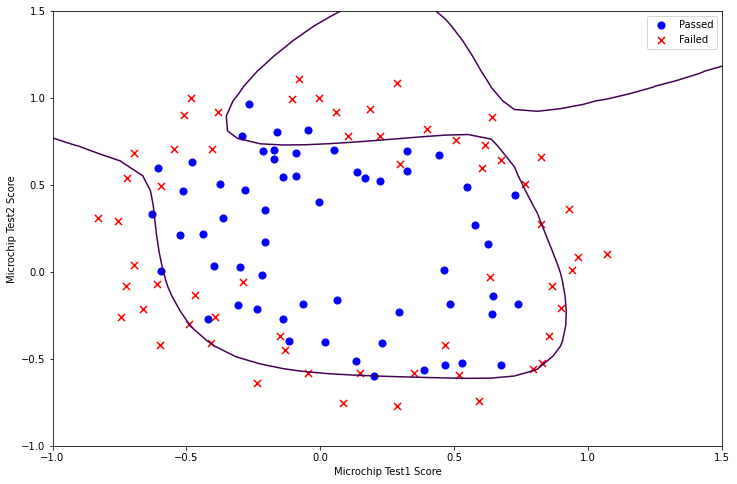

In [37]:
dataset2 = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC 5220\Lab3_data2.txt', header=None, names=['Microchip Test1','Microchip Test2', "Grade"]) 
positive2 = dataset2[dataset2['Grade'].isin([1])]  # bringing in my data
negative2 = dataset2[dataset2['Grade'].isin([0])]
optimized_thetas2 = np.asarray(opt_lamb0)  # bringing in optimized thetas
optimized_thetas2 = optimized_thetas2.ravel()


ax = plt.gca()
xlim = ax.get_xlim()  # trying to create grids
ylim = ax.get_ylim()

u = np.linspace(-1, 1.5, 30)
v = np.linspace(-1, 1.5, 30)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(x1, x2):  # trying to plot the decision boundary for lambda = 0 
    degree = 6
    output = np.ones(1)
    for i in range(0, degree+1):
        for j in range(i+1):
            output = np.hstack((output, np.multiply(np.power(x1, i-j), np.power(x2, j))))
    return output

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), optimized_thetas2.T)
        
ax.scatter(positive2['Microchip Test1'], positive2['Microchip Test2'], s=50, c='b', marker='o', label='Passed')
ax.scatter(negative2['Microchip Test1'], negative2['Microchip Test2'], s=50, c='r', marker='x', label='Failed')
ax.set_xlabel('Microchip Test1 Score')  # plotting data
ax.set_ylabel('Microchip Test2 Score')
ax.legend(loc = "best")
ax.contour(u, v, z, levels = [-1])  # using contour to get decision boundary

###############################################################################################################################

## Step 6: Implement a classification function

In [38]:
def classification(theta2, x2): # creating classification function very similar to predicition function in part 1
    classified_values = []
    probability = sigmoid_function(x2 * theta2.T) # the probabilty or likelihood it will be a 1 or 0
    for x2 in probability:
        if x2 >= 0.5:  # if x is above the threshold of 0.5 it classifies a 1
            classified_values.append(1)
        else:
            classified_values.append(0)  # else it classifies as 0 
    return classified_values

In [39]:
minimized_thetas2 = np.matrix(opt_lamb0)  # getting thetas for when lambda = 0 
classified_values = classification(minimized_thetas2, x2)
print(classified_values)
one_counter = 0
zero_counter = 0
for i in classified_values:
    if i == 1:
        one_counter += 1
    else:
        zero_counter +=1

print()
print("When Lambda = 0")
print("Number of Microchips Accepted:", one_counter)
print("Number of Microchips Rejected:", zero_counter)
accuracy = accuracy_score(y2, classified_values)
print("Accuracy:", accuracy)
print()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

When Lambda = 0
Number of Microchips Accepted: 59
Number of Microchips Rejected: 59
Accuracy: 0.7711864406779662



In [40]:
print('\033[1m' + "Important Side Note:")
print('\033[1m' + "Our resuts show that our accuracy and predictions are best when lambda = 0.")
print('\033[1m' + "Below you can see the prediction results when lambda = 1 and lambda = 100. ")

Important Side Note:
Our resuts show that our accuracy and predictions are best when lambda = 0.
Below you can see the prediction results when lambda = 1 and lambda = 100. 


In [41]:
minimized_thetas2 = np.matrix(opt_lamb1)
classified_values = classification(minimized_thetas2, x2)
print(classified_values)
one_counter = 0
zero_counter = 0
for i in classified_values:
    if i == 1:
        one_counter += 1
    else:
        zero_counter +=1

print()
print("When Lambda = 1")
print("Number of Microchips Accepted:", one_counter)
print("Number of Microchips Rejected:", zero_counter)
accuracy = accuracy_score(y2, classified_values)
print("Accuracy:", accuracy)
print()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

When Lambda = 1
Number of Microchips Accepted: 0
Number of Microchips Rejected: 118
Accuracy: 0.5084745762711864



In [42]:
minimized_thetas2 = np.matrix(opt_lamb100)
classified_values = classification(minimized_thetas2, x2)
print(classified_values)
one_counter = 0
zero_counter = 0
for i in classified_values:
    if i == 1:
        one_counter += 1
    else:
        zero_counter +=1

print()
print("When Lambda = 100")
print("Number of Microchips Accepted:", one_counter)
print("Number of Microchips Rejected:", zero_counter)
accuracy = accuracy_score(y2, classified_values)
print("Accuracy:", accuracy)
print()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

When Lambda = 100
Number of Microchips Accepted: 118
Number of Microchips Rejected: 0
Accuracy: 0.4915254237288136



###############################################################################################################################

## Step 7: Split Data and Implement exhaustive search to optimize the hyper-parameter

In [43]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state = 0) # splitting data
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, test_size=0.25, random_state = 0)

# print("Shapes of data:", x_train2.shape, x_test2.shape, y_train2.shape, y_test.shape, x_val2.shape, y_val2.shape)
# print("x_train2:" '\n', x_train2) # print("x_test2:" '\n', x_test2)
# print("y_train2:" "\n", y_train2) # print("y_test2:" "\n", y_test2)
# print("x_val2:" "\n", x_val2) # print("y_val2:" "\n", y_val2)

accuracy_array = [] # create empty array 
for lamb in range (101):  # using exhaustive search to optimize
    matrix = np.matrix(optimal_coeff(theta2, x2, y2, lamb)) # goes through lambdas up until 100
    predicted_i_values = predict(matrix, x_val2) # getting prediction from the matrix and x validation set
    accuracy_array.append(accuracy_score(y_val2, predicted_i_values)) # append accuracy array results
    
# print(accuracy_array)
print("Best Accuracy:", max(accuracy_array)) # finding the best accuracy
print("Optimal Lambda:", accuracy_array.index(max(accuracy_array)))  # finding the best/optimal lambda

Best Accuracy: 0.8181818181818182
Optimal Lambda: 0


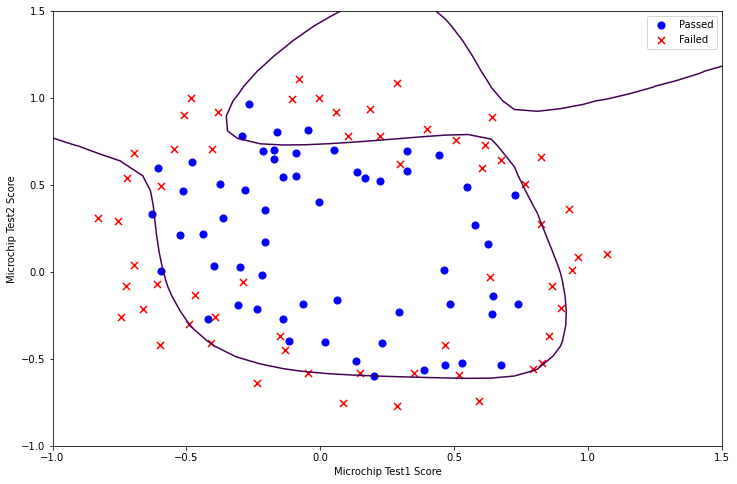

In [44]:
dataset2 = read_csv(r'C:\Users\betha\OneDrive\Documents\CSC 5220\Lab3_data2.txt', header=None, names=['Microchip Test1','Microchip Test2', "Grade"]) 
positive2 = dataset2[dataset2['Grade'].isin([1])]
negative2 = dataset2[dataset2['Grade'].isin([0])]
optimized_thetas2 = np.asarray(opt_lamb0)  # plotting the best lambda which is 0 
optimized_thetas2 = optimized_thetas2.ravel()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

u = np.linspace(-1, 1.5, 30)
v = np.linspace(-1, 1.5, 30)
z = np.zeros((len(u), len(v)))

def mapFeatureForPlotting(x1, x2):
    degree = 6
    output = np.ones(1)
    for i in range(0, degree+1):
        for j in range(i+1):
            output = np.hstack((output, np.multiply(np.power(x1, i-j), np.power(x2, j))))
    return output

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), optimized_thetas2.T)
        
ax.scatter(positive2['Microchip Test1'], positive2['Microchip Test2'], s=50, c='b', marker='o', label='Passed')
ax.scatter(negative2['Microchip Test1'], negative2['Microchip Test2'], s=50, c='r', marker='x', label='Failed')
ax.set_xlabel('Microchip Test1 Score')
ax.set_ylabel('Microchip Test2 Score')
ax.legend(loc = "best")
ax.contour(u, v, z, levels = [-1])

###############################################################################################################################

## Step 8: Evaluate model on test data and provide the confusion matrix, precision, recall, F1 score, accuracy, and AUC of the ROC curve

In [45]:
optimizing = optimal_coeff(theta2, x_train2, y_train2)  # same as what I did above for part 1
opt_matrix = np.matrix(optimizing)
yTrain_predicted_values = predict(opt_matrix, x_train2) # using the training data

print("Confusion Matrix:\n", confusion_matrix(y_train2, yTrain_predicted_values))
print("Precision:", precision_score(y_train2, yTrain_predicted_values))
print("Recall:", recall_score(y_train2, yTrain_predicted_values))
print("F1:", f1_score(y_train2, yTrain_predicted_values))
print("Accuracy:", accuracy_score(y_train2, yTrain_predicted_values))
print("ROC AUC Score:", roc_auc_score(y_train2, yTrain_predicted_values))

Confusion Matrix:
 [[28  7]
 [ 5 26]]
Precision: 0.7878787878787878
Recall: 0.8387096774193549
F1: 0.8125
Accuracy: 0.8181818181818182
ROC AUC Score: 0.8193548387096775


In [46]:
yTest_predicted_values = predict(opt_matrix, x_test2) # using the testing data

print("Confusion Matrix:\n", confusion_matrix(y_test2, yTest_predicted_values))
print("Precision:",precision_score(y_test2, yTest_predicted_values))
print("Recall:",recall_score(y_test2, yTest_predicted_values))
print("F1:", f1_score(y_test2, yTest_predicted_values))
print("Accuracy:", accuracy_score(y_test2, yTest_predicted_values))
print("ROC AUC Score:", roc_auc_score(y_test2, yTest_predicted_values))

Confusion Matrix:
 [[14  2]
 [ 3 11]]
Precision: 0.8461538461538461
Recall: 0.7857142857142857
F1: 0.8148148148148148
Accuracy: 0.8333333333333334
ROC AUC Score: 0.8303571428571429


###############################################################################################################################

## Step 9: Built-in Logistic Regression Function of Scikit Learn

In [47]:
model = LogisticRegression()   # uses built in logistic function
model.fit(x_train2, y_train2)
predicted_classes2 = model.predict(x_test2)
confuse_matrix =confusion_matrix(y_test2.flatten(),predicted_classes2)
precision = precision_score(y_test2.flatten(),predicted_classes2)
recall = recall_score(y_test2.flatten(),predicted_classes2)
F1 = f1_score(y_test2.flatten(),predicted_classes2)
accuracy = accuracy_score(y_test2.flatten(),predicted_classes2)
roc_auc = roc_auc_score(y_test2.flatten(),predicted_classes2)
parameters = model.coef_

print('The confusion matrix using scikit-learn is: \n {}'.format(confuse_matrix))
print('The precision score using scikit-learn is: {}'.format(precision))
print('The recall score using scikit-learn is: {}'.format(recall))
print('The F1 score using scikit-learn is: {}'.format(F1))
print('The accuracy score using scikit-learn is: {}'.format(accuracy))# the results of the built in functions on scikit learn
print('The ROC-AUC score using scikit-learn is: {}'.format(roc_auc)) # are VERY VERY similar to my results above

The confusion matrix using scikit-learn is: 
 [[14  2]
 [ 3 11]]
The precision score using scikit-learn is: 0.8461538461538461
The recall score using scikit-learn is: 0.7857142857142857
The F1 score using scikit-learn is: 0.8148148148148148
The accuracy score using scikit-learn is: 0.8333333333333334
The ROC-AUC score using scikit-learn is: 0.8303571428571429


C:\Users\betha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
